# Meringkas Berita

Nama : Muhammad Adam Zaky Jiddyansah

Kelas : Pencarian dan Penambangan Web

# Menginstall dan importing modul / libray yang akan digunakan

In [64]:
!pip install seaborn matplotlib
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer, TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import word_tokenize
from collections import Counter
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Membaca Data Berita

In [52]:
from google.colab import drive
drive.mount('/content/drive')
file_path = "/content/drive/My Drive/Penambangan WEB/Data/Data_BeritaKompas.csv"
df = pd.read_csv(file_path)
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Judul,Berita
0,"Lirik dan Makna Lagu Oh Indang Oh Apang, Lagu ...","Lirik dan Makna Lagu Oh Indang Oh Apang, Lagu ..."
1,Berapa Banyak Kalori yang Dibakar dengan Berja...,Berapa Banyak Kalori yang Dibakar dengan Berja...
2,"Pendaftaran Petugas KPPS Pemilu 2024 Dibuka, B...","Pendaftaran Petugas KPPS Pemilu 2024 Dibuka, B..."
3,Produser Ungkap Tiket Advance Siksa Neraka Sol...,Produser Ungkap Tiket Advance Siksa Neraka Sol...
4,"Peringati Hari Korban 40 Ribu Jiwa, Pj Gubernu...","Peringati Hari Korban 40 Ribu Jiwa, Pj Gubernu..."
5,Lirik dan Chord Lagu Salam Kenal - Vidi Aldiano,Lirik dan Chord Lagu Salam Kenal - Vidi Aldian...
6,"Pikap Tabrak Truk Tronton di Kota Malang, Satu...","Pikap Tabrak Truk Tronton di Kota Malang, Satu..."
7,Perbandingan Yamaha XMAX 250 Tech Max dan Kymc...,Perbandingan Yamaha XMAX 250 Tech Max dan Kymc...
8,Hasil Mediasi Keluarga Bayi HNM: RS Hermina Po...,Hasil Mediasi Keluarga Bayi HNM: RS Hermina Po...
9,"Tanggapi Hasil Survei Litbang ""Kompas"", Mahfud...","Tanggapi Hasil Survei Litbang ""Kompas"", Mahfud..."


## Mengambil salah satu *berita*

In [53]:
berita = df['Berita'].iloc[15]
berita

'Begini Peran Teknik Industri dalam Pemanfaatan AI di Era Industri 4.0\n\nKOMPAS.com – Implementasi kecerdasan buatan atau artificial intelligence (AI) dalam industri menjadi salah satu poin utama untuk merespons kompleksitas era digital.\nTidak hanya berpengaruh pada operasional bisnis, AI juga dapat membuka pintu bagi berbagai peluang inovatif.\nSelain AI, era yang dikenal sebagai industri 4.0 menggambarkan integrasi teknologi canggih lain, seperti internet of things (IoT) dan big data, dalam proses industri. Integrasi ini dilakukan untuk meningkatkan efisiensi dan produktivitas.\nPada tingkat global, AI telah menjadi katalisator perubahan dalam industri. Menurut laporan dari Grand View Research, pasar AI diproyeksikan mencapai nilai triliunan dollar AS pada 2028 dengan tingkat pertumbuhan yang signifikan.\nHal senada juga disampaikan National Technology Officer Microsoft Indonesia Panji Wasmana. Menurutnya, teknologi AI dan komputasi awan (cloud) memainkan peranan penting dalam mewu

# Pra-pemrosesan Teks / Preprocessing

Mengambil teks sebagai input dan melakukan beberapa langkah pra-pemrosesan pada teks dalam bahasa Indonesia. Langkah-langkah tersebut mencakup penghapusan angka, pembersihan karakter khusus, konversi teks ke huruf kecil, penghapusan kata-kata umum (stopwords), dan penggabungan kata-kata yang telah melalui proses sebelumnya. Tujuannya adalah membersihkan dan mempersiapkan teks agar dapat digunakan lebih lanjut dalam analisis atau pemrosesan lanjutan.


In [54]:
def preprocessing(text):
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s.]', '', text)
    text = text.lower()

    stop_words = set(stopwords.words('indonesian'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]

    preprocessing_text = ' '.join(filtered_words)

    return preprocessing_text

In [55]:
berita = preprocessing(berita)
print(berita)

peran teknik industri pemanfaatan ai era industri . kompas.com implementasi kecerdasan buatan artificial intelligence ai industri salah poin utama merespons kompleksitas era digital. berpengaruh operasional bisnis ai membuka pintu peluang inovatif. ai era dikenal industri . menggambarkan integrasi teknologi canggih internet of things iot big data proses industri. integrasi meningkatkan efisiensi produktivitas. tingkat global ai katalisator perubahan industri. laporan grand view research pasar ai diproyeksikan mencapai nilai triliunan dollar as tingkat pertumbuhan signifikan. senada national technology officer microsoft indonesia panji wasmana. menurutnya teknologi ai komputasi awan cloud memainkan peranan mewujudkan industri .. industri meningkatkan kolaborasi automasi produktivitas kemampuan analisis data pelaku industri terdepan. survei pwc persen eksekutif perusahaan percaya ai berdampak positif rantai pasok meningkatkan visibilitas responsif perubahan pasar. tecermin sektor manufak

In [56]:
kalimat = nltk.sent_tokenize(berita)
kalimat = [sentence.replace('.', '') for sentence in kalimat]
print(kalimat)

['peran teknik industri pemanfaatan ai era industri ', 'kompascom implementasi kecerdasan buatan artificial intelligence ai industri salah poin utama merespons kompleksitas era digital', 'berpengaruh operasional bisnis ai membuka pintu peluang inovatif', 'ai era dikenal industri ', 'menggambarkan integrasi teknologi canggih internet of things iot big data proses industri', 'integrasi meningkatkan efisiensi produktivitas', 'tingkat global ai katalisator perubahan industri', 'laporan grand view research pasar ai diproyeksikan mencapai nilai triliunan dollar as tingkat pertumbuhan signifikan', 'senada national technology officer microsoft indonesia panji wasmana', 'menurutnya teknologi ai komputasi awan cloud memainkan peranan mewujudkan industri  industri meningkatkan kolaborasi automasi produktivitas kemampuan analisis data pelaku industri terdepan', 'survei pwc persen eksekutif perusahaan percaya ai berdampak positif rantai pasok meningkatkan visibilitas responsif perubahan pasar', 'te

# Ekstraksi kalimat

Ekstraksi kalimat adalah suatu teknik atau proses yang bertujuan untuk mengidentifikasi dan mengekstrak kalimat-kalimat penting atau relevan dari sebuah dokumen teks. Tujuan utamanya adalah untuk merangkum informasi yang terkandung dalam teks tanpa menghilangkan inti dari pesan yang ingin disampaikan. Metode ekstraksi kalimat berfokus pada pemilihan kalimat-kalimat yang dianggap memiliki nilai informasi tinggi atau representatif dari keseluruhan teks.

## Metode pengukuran TF-IDF
Mengonversi teks yang sudah melewati tahap pra-pemrosesan menjadi representasi matriks numerik menggunakan skema TF-IDF. Matriks ini mencerminkan bobot TF-IDF dari setiap kata dalam setiap kalimat. Setelah transformasi, DataFrame pandas dibuat untuk menyajikan matriks tersebut dengan kata-kata sebagai kolom dan setiap baris mewakili satu kalimat, menunjukkan bobot TF-IDF dari kata-kata tersebut dalam kalimat tersebut.

In [57]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_preprocessing = tfidf_vectorizer.fit_transform(kalimat)

terms = tfidf_vectorizer.get_feature_names_out()
tfidf_preprocessing = pd.DataFrame(data=tfidf_preprocessing.toarray(), columns=terms)

tfidf_preprocessing

,ai,akses,akurat,alat,all,analisis,aplikasi,ar,artificial,as,...,university,upaya,utama,view,virtual,visibilitas,visualisasi,vr,wasmana,xite
0,0.242502,0.000000,0.0000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.142902,0.000000,0.0000,0.000000,0.00000,0.000000,0.000000,0.000000,0.301414,0.000000,...,0.000000,0.000000,0.272163,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.187425,0.000000,0.0000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.333926,0.000000,0.0000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.0000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.0000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.235964,0.000000,0.0000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.127922,0.000000,0.0000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.269819,...,0.000000,0.000000,0.000000,0.269819,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.0000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.353553,0.000000
9,0.117251,0.000000,0.0000,0.000000,0.00000,0.223311,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# Membuat Graph
Membuat graf yang merepresentasikan hubungan antara kalimat-kalimat berdasarkan nilai cosine similarity. Setiap kalimat direpresentasikan sebagai node, dan garis yang menghubungkan dua node menunjukkan tingkat kemiripan antara kalimat tersebut. Semakin panjang dan tebal garis, semakin tinggi tingkat kemiripan antara dua kalimat. Graf ini membantu memvisualisasikan struktur hubungan antar kalimat dalam teks.

## Perhitungan Kemiripan Kosinus
Menghitung kemiripan kosinus antara semua pasangan kalimat menggunakan matriks TF-IDF yang telah dihasilkan sebelumnya. Kemudian, hasil kemiripan kosinus tersebut disimpan dalam DataFrame untuk kemudahan analisis.

**Rumus Perhitungan Kemiripan Kosinus:**
*   Untuk dua vektor A dan B, kemiripan kosinus dihitung dengan rumus $$ \text{Similarity}(A, B) = \frac{{A \cdot B}}{{\|A\| \cdot \|B\|}} $$

*   Di sini, ⋅ adalah operasi perkalian dot (dot product), dan ∥∥ adalah norma Euclidean. Dalam konteks ini, vektor A dan B adalah vektor representasi TF-IDF dari dua kalimat. Hasilnya adalah skalar yang menunjukkan seberapa mirip dua kalimat tersebut, dengan nilai 1 menunjukkan kemiripan sempurna.


In [58]:
cosine_preprocessing = cosine_similarity(tfidf_preprocessing, tfidf_preprocessing)

In [59]:
similarity_preprocessing = pd.DataFrame(cosine_preprocessing, columns=range(len(kalimat)), index=range(len(kalimat)))
similarity_preprocessing

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,1.000000,0.184595,0.045451,0.431353,0.061610,0.000000,0.149652,0.031021,0.0,0.166220,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.160423,0.0,0.000000,0.0
1,0.184595,1.000000,0.026783,0.215648,0.018153,0.000000,0.060953,0.018280,0.0,0.057353,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021199,0.0,0.062608,0.0
2,0.045451,0.026783,1.000000,0.062586,0.000000,0.000000,0.044226,0.023976,0.0,0.021976,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.079888,0.000000,0.0,0.000000,0.0
3,0.431353,0.215648,0.062586,1.000000,0.042418,0.000000,0.142433,0.042717,0.0,0.134020,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.049536,0.0,0.000000,0.0
4,0.061610,0.018153,0.000000,0.042418,1.000000,0.119776,0.029974,0.000000,0.0,0.125885,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.060496,0.023332,0.0,0.000000,0.0
5,0.000000,0.000000,0.000000,0.000000,0.119776,1.000000,0.000000,0.000000,0.0,0.208740,...,0.000000,0.000000,0.000000,0.000000,0.138930,0.000000,0.000000,0.0,0.000000,0.0
6,0.149652,0.060953,0.044226,0.142433,0.029974,0.000000,1.000000,0.139675,0.0,0.094703,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.035004,0.0,0.000000,0.0
7,0.031021,0.018280,0.023976,0.042717,0.000000,0.000000,0.139675,1.000000,0.0,0.014999,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
9,0.166220,0.057353,0.021976,0.134020,0.125885,0.208740,0.094703,0.014999,0.0,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052180,0.0,0.000000,0.0


## Graph


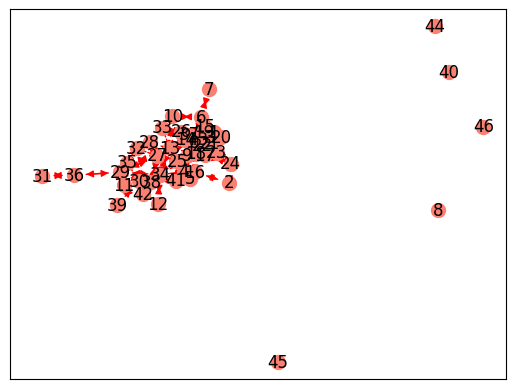

In [76]:
G_preprocessing = nx.DiGraph()

# Add nodes to the graph
for i in range(len(cosine_preprocessing)):
    G_preprocessing.add_node(i)

# Add edges based on similarity
for i in range(len(cosine_preprocessing)):
    for j in range(len(cosine_preprocessing)):
        similarity = cosine_preprocessing[i][j]
        if similarity > 0.1 and i != j:
            G_preprocessing.add_edge(i, j)

# Specify the layout (spring_layout for example)
pos = nx.spring_layout(G_preprocessing)

# Draw the graph
nx.draw_networkx_nodes(G_preprocessing, pos, node_size=100, node_color='salmon')
nx.draw_networkx_edges(G_preprocessing, pos, edge_color='red', arrows=True)
nx.draw_networkx_labels(G_preprocessing, pos)

plt.show()

# Presentasikan Ukuran dengan Matriks Sentralitas


## Closeness
Menghitung dan menganalisis Closeness Centrality pada graf G_preprocessing

In [78]:
closeness_preprocessing = nx.closeness_centrality(G_preprocessing)

sorted_closeness_preprocessing = sorted(closeness_preprocessing.items(), key=lambda x: x[1], reverse=True)
print("Closeness Centrality:")
for node, closeness in sorted_closeness_preprocessing:
    print(f"Node {node}: {closeness:.4f}")

Closeness Centrality:
Node 18: 0.4746
Node 34: 0.4746
Node 0: 0.4626
Node 25: 0.4568
Node 27: 0.4568
Node 22: 0.4153
Node 13: 0.4106
Node 16: 0.4106
Node 21: 0.4060
Node 43: 0.3972
Node 3: 0.3929
Node 17: 0.3888
Node 23: 0.3888
Node 30: 0.3888
Node 4: 0.3847
Node 9: 0.3847
Node 19: 0.3847
Node 1: 0.3807
Node 26: 0.3807
Node 41: 0.3767
Node 29: 0.3729
Node 37: 0.3691
Node 15: 0.3654
Node 14: 0.3583
Node 5: 0.3548
Node 32: 0.3548
Node 35: 0.3447
Node 20: 0.3384
Node 6: 0.3353
Node 38: 0.3322
Node 33: 0.3292
Node 42: 0.3263
Node 11: 0.3234
Node 24: 0.3206
Node 10: 0.3178
Node 12: 0.3123
Node 28: 0.3097
Node 2: 0.3020
Node 39: 0.2727
Node 36: 0.2687
Node 7: 0.2453
Node 31: 0.2076
Node 8: 0.0000
Node 40: 0.0000
Node 44: 0.0000
Node 45: 0.0000
Node 46: 0.0000


# Hasil Ringkasan Berita Dengan Closeness Centrality

In [80]:
ringkasan_closeness_preprocessing = ""
print("Tiga Node Tertinggi Closeness Centrality Menggunakan Preprocessing:")
for node, closeness_preprocessing in sorted_closeness_preprocessing[:3]:
    top_sentence = kalimat[node]
    ringkasan_closeness_preprocessing += top_sentence + " "
    print(f"Node {node}: Closeness Centrality = {closeness_preprocessing:.4f}")
    print(f"Kalimat: {top_sentence}\n")

Tiga Node Tertinggi Closeness Centrality Menggunakan Preprocessing:
Node 18: Closeness Centrality = 0.4746
Kalimat: teknik industri solusi menghadapi kompleksitas transformasi industri didorong ai ilmu teknik industri garda terdepan mendidik calon pemimpin memahami integrasi teknologi proses bisnis

Node 34: Closeness Centrality = 0.4746
Kalimat: mahasiswa memahami menganalisis proses industri manufaktur menyeluruh

Node 0: Closeness Centrality = 0.4626
Kalimat: peran teknik industri pemanfaatan ai era industri 

Ringkasan Berita Menggunakan Closeness Centrality:
teknik industri solusi menghadapi kompleksitas transformasi industri didorong ai ilmu teknik industri garda terdepan mendidik calon pemimpin memahami integrasi teknologi proses bisnis mahasiswa memahami menganalisis proses industri manufaktur menyeluruh peran teknik industri pemanfaatan ai era industri  


In [86]:
print("Ringkasan Berita Menggunakan Closeness Centrality:")
print(ringkasan_closeness_preprocessing)

Ringkasan Berita Menggunakan Closeness Centrality:
teknik industri solusi menghadapi kompleksitas transformasi industri didorong ai ilmu teknik industri garda terdepan mendidik calon pemimpin memahami integrasi teknologi proses bisnis mahasiswa memahami menganalisis proses industri manufaktur menyeluruh peran teknik industri pemanfaatan ai era industri  


##  Menghitung peringkat halaman dengan Pagerank
Rumus Perhitungan Manual PageRank:


*   PageRank mengukur pentingnya suatu node dalam sebuah graf berdasarkan seberapa banyak node lain yang mengarah ke node tersebut. Rumusnya adalah sebagai berikut:
$$PR(x) = (1 - d) + d \left( \frac{{L(y)}}{{PR(y)}} \right)$$
*   PR(x) adalah PageRank dari node x.
*   d adalah faktor damping, biasanya diatur sebagai 0,85.
*   PR(y) adalah PageRank dari node yang memiliki tautan ke node y.
*   L(y) adalah jumlah tautan keluar dari node y.
*   Iterasi dilakukan hingga konvergensi atau sejumlah iterasi tertentu. Semakin tinggi nilai PageRank, semakin "penting" node tersebut dalam graf.







In [82]:
pagerank_preprocessing = nx.pagerank(G_preprocessing)

sorted_pagerank_preprocessing= sorted(pagerank_preprocessing.items(), key=lambda x: x[1], reverse=True)
print("Page Rank :")
for node, pagerank_preprocessing in sorted_pagerank_preprocessing:
    print(f"Node {node}: {pagerank_preprocessing:.4f}")

Page Rank :
Node 34: 0.0512
Node 18: 0.0480
Node 0: 0.0442
Node 21: 0.0377
Node 27: 0.0361
Node 30: 0.0336
Node 25: 0.0334
Node 9: 0.0331
Node 22: 0.0320
Node 29: 0.0309
Node 13: 0.0303
Node 3: 0.0287
Node 43: 0.0276
Node 19: 0.0275
Node 26: 0.0259
Node 16: 0.0252
Node 23: 0.0251
Node 1: 0.0250
Node 6: 0.0236
Node 17: 0.0236
Node 37: 0.0219
Node 20: 0.0218
Node 5: 0.0205
Node 14: 0.0204
Node 4: 0.0202
Node 35: 0.0195
Node 32: 0.0193
Node 38: 0.0191
Node 15: 0.0185
Node 41: 0.0176
Node 24: 0.0174
Node 36: 0.0170
Node 42: 0.0153
Node 33: 0.0138
Node 11: 0.0115
Node 10: 0.0112
Node 2: 0.0108
Node 31: 0.0107
Node 28: 0.0107
Node 39: 0.0076
Node 7: 0.0075
Node 12: 0.0071
Node 8: 0.0035
Node 40: 0.0035
Node 44: 0.0035
Node 45: 0.0035
Node 46: 0.0035


# Hasil Ringkasan dengan Page Rank

In [83]:
ringkasan_pagerank_preprocessing = ""
print("Tiga Node Tertinggi Page Rank Menggunakan Preprocessing:")
for node, pagerank_preprocessing in sorted_pagerank_preprocessing[:3]:
    top_sentence = kalimat[node]
    ringkasan_pagerank_preprocessing += top_sentence + " "
    print(f"Node {node}: Page Rank = {pagerank_preprocessing:.4f}")
    print(f"Kalimat: {top_sentence}\n")

Tiga Node Tertinggi Page Rank Menggunakan Preprocessing:
Node 34: Page Rank = 0.0512
Kalimat: mahasiswa memahami menganalisis proses industri manufaktur menyeluruh

Node 18: Page Rank = 0.0480
Kalimat: teknik industri solusi menghadapi kompleksitas transformasi industri didorong ai ilmu teknik industri garda terdepan mendidik calon pemimpin memahami integrasi teknologi proses bisnis

Node 0: Page Rank = 0.0442
Kalimat: peran teknik industri pemanfaatan ai era industri 



In [87]:
print("Ringkasan Berita Menggunakan Page Rank:")
print(ringkasan_pagerank_preprocessing)

Ringkasan Berita Menggunakan Page Rank:
mahasiswa memahami menganalisis proses industri manufaktur menyeluruh teknik industri solusi menghadapi kompleksitas transformasi industri didorong ai ilmu teknik industri garda terdepan mendidik calon pemimpin memahami integrasi teknologi proses bisnis peran teknik industri pemanfaatan ai era industri  


## menggunakan metode eigenvector centrality untuk menghitung sentralitas eigenvector pada graf
Rumus Perhitungan Manual Eigenvector Centrality:
*   Eigenvector Centrality mengukur pentingnya suatu node dalam suatu graf berdasarkan pada seberapa banyak node lain yang terhubung ke node tersebut. Rumusnya adalah sebagai berikut:
$$x_i = \frac{1}{\lambda} \sum_{j=1}^{n} A_{ij} x_j$$

* xi adalah eigenvector centrality dari node i
* Aij adalah elemen matriks ketetanggaan yang menunjukkan apakah ada tautan antara node i dan j
*   λ adalah nilai eigen (eigenvalue) yang sesuai dengan eigenvector yang dicari.
*   Iterasi dilakukan hingga konvergensi atau sejumlah iterasi tertentu. Semakin tinggi nilai eigenvector centrality, semakin "penting" node tersebut dalam graf.







In [84]:
eigenvector_preprocessing = nx.eigenvector_centrality(G_preprocessing)

sorted_eigenvector_preprocessing= sorted(eigenvector_preprocessing.items(), key=lambda x: x[1], reverse=True)
print("Eigen Vector :")
for node, eigenvector_preprocessing in sorted_eigenvector_preprocessing:
    print(f"Node {node}: {eigenvector_preprocessing:.4f}")

Eigen Vector :
Node 0: 0.3588
Node 18: 0.3579
Node 21: 0.2843
Node 22: 0.2628
Node 3: 0.2366
Node 43: 0.2350
Node 9: 0.2343
Node 19: 0.2339
Node 23: 0.2249
Node 25: 0.2062
Node 1: 0.1965
Node 15: 0.1618
Node 34: 0.1588
Node 26: 0.1552
Node 37: 0.1496
Node 20: 0.1494
Node 27: 0.1486
Node 4: 0.1170
Node 6: 0.1109
Node 17: 0.1055
Node 16: 0.1011
Node 5: 0.0917
Node 14: 0.0859
Node 41: 0.0805
Node 24: 0.0790
Node 13: 0.0679
Node 30: 0.0670
Node 29: 0.0553
Node 38: 0.0408
Node 33: 0.0383
Node 35: 0.0380
Node 32: 0.0357
Node 28: 0.0335
Node 42: 0.0331
Node 11: 0.0266
Node 2: 0.0223
Node 10: 0.0222
Node 12: 0.0197
Node 7: 0.0137
Node 39: 0.0083
Node 36: 0.0070
Node 31: 0.0009
Node 8: 0.0000
Node 40: 0.0000
Node 44: 0.0000
Node 45: 0.0000
Node 46: 0.0000


# Hasil Ringkasan menggunakan Eigen Vektor

In [85]:
ringkasan_eigenvector_preprocessing = ""
print("Tiga Node Tertinggi Eigen Vector Menggunakan Preprocessing:")
for node, eigenvector_preprocessing in sorted_eigenvector_preprocessing[:3]:
    top_sentence = kalimat[node]
    ringkasan_eigenvector_preprocessing += top_sentence + " "
    print(f"Node {node}: Page Rank = {eigenvector_preprocessing:.4f}")
    print(f"Kalimat: {top_sentence}\n")

Tiga Node Tertinggi Eigen Vector Menggunakan Preprocessing:
Node 0: Page Rank = 0.3588
Kalimat: peran teknik industri pemanfaatan ai era industri 

Node 18: Page Rank = 0.3579
Kalimat: teknik industri solusi menghadapi kompleksitas transformasi industri didorong ai ilmu teknik industri garda terdepan mendidik calon pemimpin memahami integrasi teknologi proses bisnis

Node 21: Page Rank = 0.2843
Kalimat: program studi teknik industri binus university menyajikan kurikulum terkini relevan menjembatani kesenjangan teknologi ai kebutuhan bisnis taufik siaran pers diterima kompascom senin 



In [88]:
print("Ringkasan Berita Menggunakan Eigenvector Centrality:")
print(ringkasan_eigenvector_preprocessing)

Ringkasan Berita Menggunakan Eigenvector Centrality:
peran teknik industri pemanfaatan ai era industri  teknik industri solusi menghadapi kompleksitas transformasi industri didorong ai ilmu teknik industri garda terdepan mendidik calon pemimpin memahami integrasi teknologi proses bisnis program studi teknik industri binus university menyajikan kurikulum terkini relevan menjembatani kesenjangan teknologi ai kebutuhan bisnis taufik siaran pers diterima kompascom senin  
